# 🎓 Week 7 - Day 2: K-Nearest Neighbors & Clustering

## Today's Goals:
✅ Master K-Nearest Neighbors (KNN) for classification & regression

✅ Understand distance metrics

✅ Learn clustering concepts

✅ Apply K-Means algorithm

✅ Find optimal K with Elbow Method

✅ Evaluate clusters with Silhouette Score

---

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_blobs, make_moons
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
print('✅ Libraries imported!')

✅ Libraries imported!


---
## Part 1: KNN for Classification

**"You are the average of your K neighbors!"**

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only 2 features for visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print(f'Classes: {iris.target_names}')

Training samples: 120
Test samples: 30
Classes: ['setosa' 'versicolor' 'virginica']


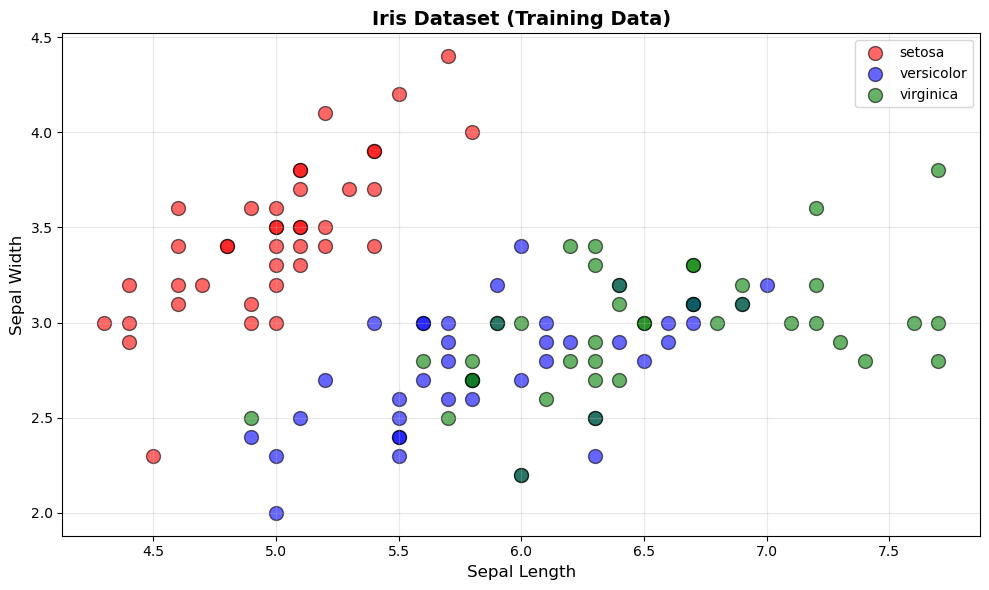


💡 Can we predict the class of a new point?
   → Look at its nearest neighbors!


In [3]:
# Visualize the data
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    idx = y_train == i
    plt.scatter(X_train[idx, 0], X_train[idx, 1], 
               c=color, label=iris.target_names[i], 
               alpha=0.6, s=100, edgecolors='k')

plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('Iris Dataset (Training Data)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('\n💡 Can we predict the class of a new point?')
print('   → Look at its nearest neighbors!')

In [4]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print('✅ KNN model trained with K=5')

# Predict
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'\nAccuracy: {accuracy:.3f}')
print(f'\nSample predictions:')
for i in range(5):
    print(f'  True: {iris.target_names[y_test[i]]}, '
          f'Predicted: {iris.target_names[y_pred[i]]}')

✅ KNN model trained with K=5

Accuracy: 0.800

Sample predictions:
  True: versicolor, Predicted: versicolor
  True: setosa, Predicted: setosa
  True: virginica, Predicted: virginica
  True: versicolor, Predicted: versicolor
  True: versicolor, Predicted: versicolor


### Finding the Best K

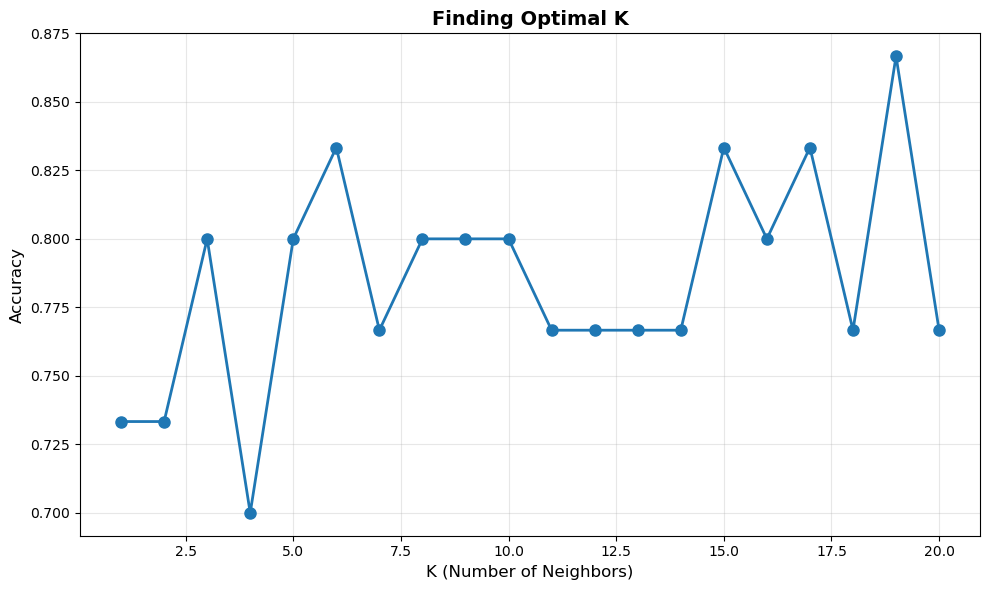


✅ Best K: 19 with accuracy: 0.867


In [5]:
# Try different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Finding Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f'\n✅ Best K: {best_k} with accuracy: {max(accuracies):.3f}')

---
## Part 2: KNN for Regression

**Predicting continuous values, not classes**

In [6]:
# Create simple regression data
X_reg = np.linspace(0, 10, 50).reshape(-1, 1)
y_reg = 2 * X_reg.ravel() + np.sin(X_reg.ravel()) * 5 + np.random.normal(0, 1, 50)

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f'Training samples: {len(X_train_r)}')
print(f'Test samples: {len(X_test_r)}')

Training samples: 40
Test samples: 10


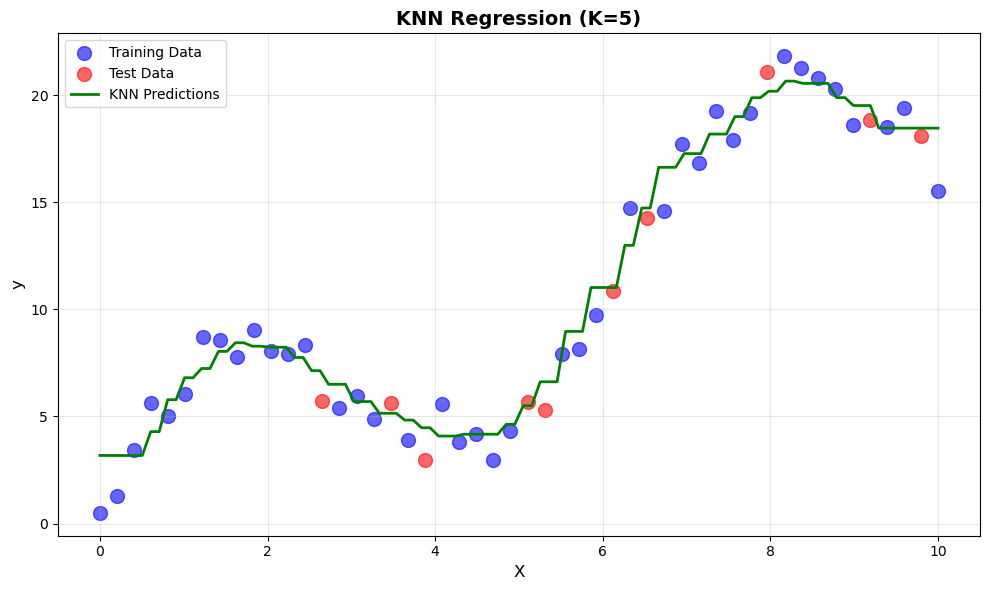


✅ R² Score: 0.981

💡 KNN averages values of nearest neighbors!


In [7]:
# Train KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r, y_train_r)

# Predict
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = knn_reg.predict(X_plot)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_train_r, y_train_r, c='blue', label='Training Data', alpha=0.6, s=100)
plt.scatter(X_test_r, y_test_r, c='red', label='Test Data', alpha=0.6, s=100)
plt.plot(X_plot, y_plot, 'g-', linewidth=2, label='KNN Predictions')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('KNN Regression (K=5)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

score = knn_reg.score(X_test_r, y_test_r)
print(f'\n✅ R² Score: {score:.3f}')
print('\n💡 KNN averages values of nearest neighbors!')

---
## Part 3: Distance Metrics Comparison

**Euclidean vs Manhattan**

In [8]:
# Calculate distances manually
point_a = np.array([1, 1])
point_b = np.array([4, 5])

# Euclidean distance
euclidean = np.sqrt(np.sum((point_b - point_a)**2))

# Manhattan distance
manhattan = np.sum(np.abs(point_b - point_a))

print('Distance between points A(1,1) and B(4,5):')
print(f'\nEuclidean (straight line): {euclidean:.2f}')
print(f'Manhattan (city block):    {manhattan:.2f}')
print('\n💡 Euclidean is shorter (as the crow flies!)')

Distance between points A(1,1) and B(4,5):

Euclidean (straight line): 5.00
Manhattan (city block):    7.00

💡 Euclidean is shorter (as the crow flies!)


In [9]:
# Compare on Iris dataset
# Scale features first!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Euclidean (p=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, p=2)
knn_euclidean.fit(X_train_scaled, y_train)
score_euclidean = knn_euclidean.score(X_test_scaled, y_test)

# Manhattan (p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1)
knn_manhattan.fit(X_train_scaled, y_train)
score_manhattan = knn_manhattan.score(X_test_scaled, y_test)

print('📊 Distance Metric Comparison (K=5):')
print(f'\nEuclidean: {score_euclidean:.3f}')
print(f'Manhattan: {score_manhattan:.3f}')
print('\n✅ Euclidean is most commonly used!')

📊 Distance Metric Comparison (K=5):

Euclidean: 0.767
Manhattan: 0.767

✅ Euclidean is most commonly used!


---
## Part 4: Introduction to Clustering

**Finding groups without labels (Unsupervised!)**

In [10]:
# Generate clustered data
X_clusters, y_true = make_blobs(
    n_samples=300, centers=4, n_features=2, 
    cluster_std=0.8, random_state=42
)

print('✅ Generated 300 points with 4 natural clusters')
print('\n💡 In real life, we don\'t know the true clusters!')
print('   Clustering algorithms find them automatically.')

✅ Generated 300 points with 4 natural clusters

💡 In real life, we don't know the true clusters!
   Clustering algorithms find them automatically.


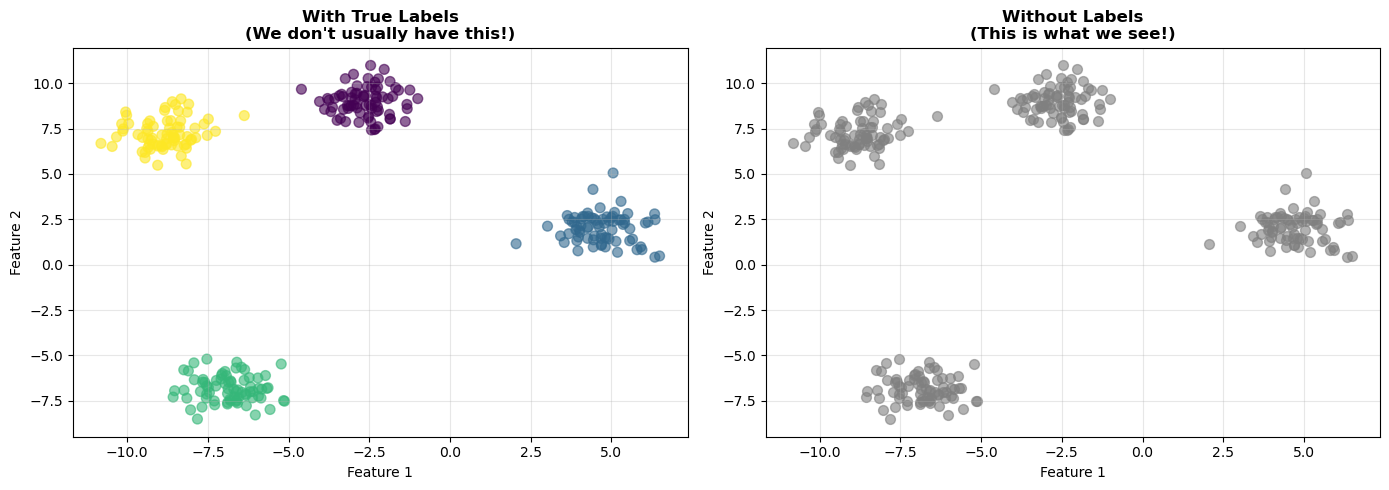


💡 Clustering finds these groups automatically!


In [11]:
# Visualize (with and without labels)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# With true labels (we normally don't have this!)
scatter1 = axes[0].scatter(X_clusters[:, 0], X_clusters[:, 1], 
                          c=y_true, cmap='viridis', s=50, alpha=0.6)
axes[0].set_title('With True Labels\n(We don\'t usually have this!)', 
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# Without labels (what we actually have)
axes[1].scatter(X_clusters[:, 0], X_clusters[:, 1], 
               c='gray', s=50, alpha=0.6)
axes[1].set_title('Without Labels\n(This is what we see!)', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n💡 Clustering finds these groups automatically!')

---
## Part 5: K-Means Clustering

**The most popular clustering algorithm**

In [12]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_clusters)

print('✅ K-Means completed!')
print(f'\nFound {len(np.unique(clusters))} clusters')
print(f'Cluster centers:\n{kmeans.cluster_centers_}')

✅ K-Means completed!

Found 4 clusters
Cluster centers:
[[-2.63715917  8.98563949]
 [-6.84180708 -6.84038791]
 [ 4.70253968  2.02807134]
 [-8.83330596  7.21790214]]


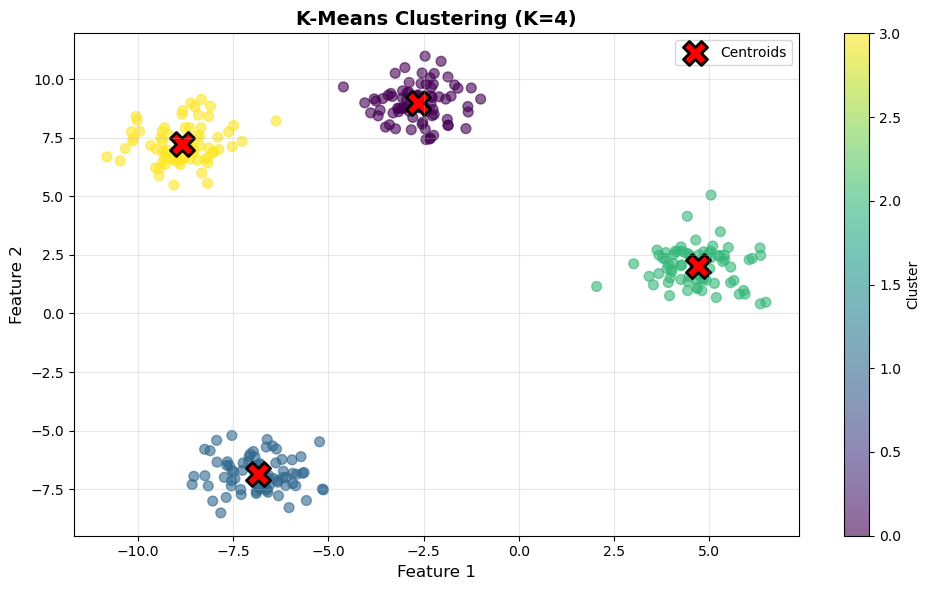


✅ Red X marks show cluster centers (centroids)
✅ Colors show which cluster each point belongs to


In [13]:
# Visualize results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_clusters[:, 0], X_clusters[:, 1], 
                     c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1],
           c='red', marker='X', s=300, edgecolors='black', 
           linewidths=2, label='Centroids')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('K-Means Clustering (K=4)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('\n✅ Red X marks show cluster centers (centroids)')
print('✅ Colors show which cluster each point belongs to')

---
## Part 6: Elbow Method - Finding Optimal K

**How many clusters should we use?**

In [14]:
# Try different K values
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clusters)
    inertias.append(kmeans.inertia_)
    print(f'K={k:2d} → Inertia: {kmeans.inertia_:8.2f}')

print('\n💡 Inertia = Sum of squared distances to nearest centroid')
print('   Lower inertia = tighter clusters')

K= 1 → Inertia: 19780.25
K= 2 → Inertia:  9211.21
K= 3 → Inertia:  1919.36
K= 4 → Inertia:   362.47
K= 5 → Inertia:   329.27
K= 6 → Inertia:   294.63
K= 7 → Inertia:   261.56
K= 8 → Inertia:   232.01
K= 9 → Inertia:   210.01
K=10 → Inertia:   192.07

💡 Inertia = Sum of squared distances to nearest centroid
   Lower inertia = tighter clusters


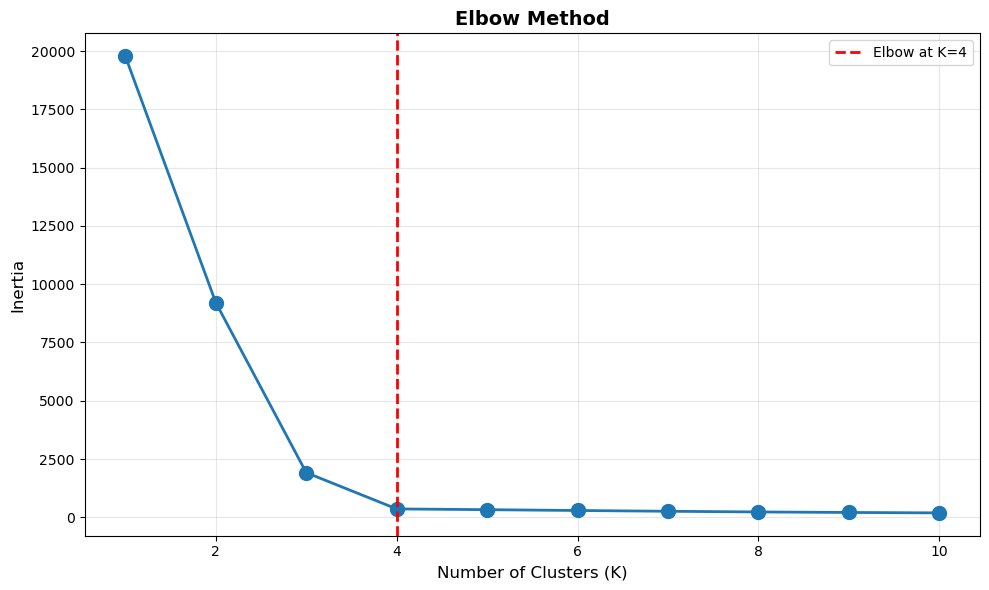


✅ The "elbow" is at K=4!
   After K=4, adding more clusters doesn't help much.


In [15]:
# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Mark the elbow
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Elbow at K=4')
plt.legend()
plt.tight_layout()
plt.show()

print('\n✅ The "elbow" is at K=4!')
print('   After K=4, adding more clusters doesn\'t help much.')

---
## Part 7: Silhouette Score - Cluster Quality

**How good are our clusters?**

In [16]:
# Calculate Silhouette scores for different K
silhouette_scores = []
K_range = range(2, 11)  # Need at least 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_clusters)
    score = silhouette_score(X_clusters, clusters)
    silhouette_scores.append(score)
    print(f'K={k:2d} → Silhouette Score: {score:.3f}')

print('\n💡 Silhouette Score: -1 (bad) to +1 (good)')
print('   > 0.7: Strong clusters')
print('   0.5-0.7: Reasonable')
print('   < 0.5: Weak clusters')

K= 2 → Silhouette Score: 0.603
K= 3 → Silhouette Score: 0.778
K= 4 → Silhouette Score: 0.834
K= 5 → Silhouette Score: 0.698
K= 6 → Silhouette Score: 0.587
K= 7 → Silhouette Score: 0.449
K= 8 → Silhouette Score: 0.332
K= 9 → Silhouette Score: 0.337
K=10 → Silhouette Score: 0.340

💡 Silhouette Score: -1 (bad) to +1 (good)
   > 0.7: Strong clusters
   0.5-0.7: Reasonable
   < 0.5: Weak clusters


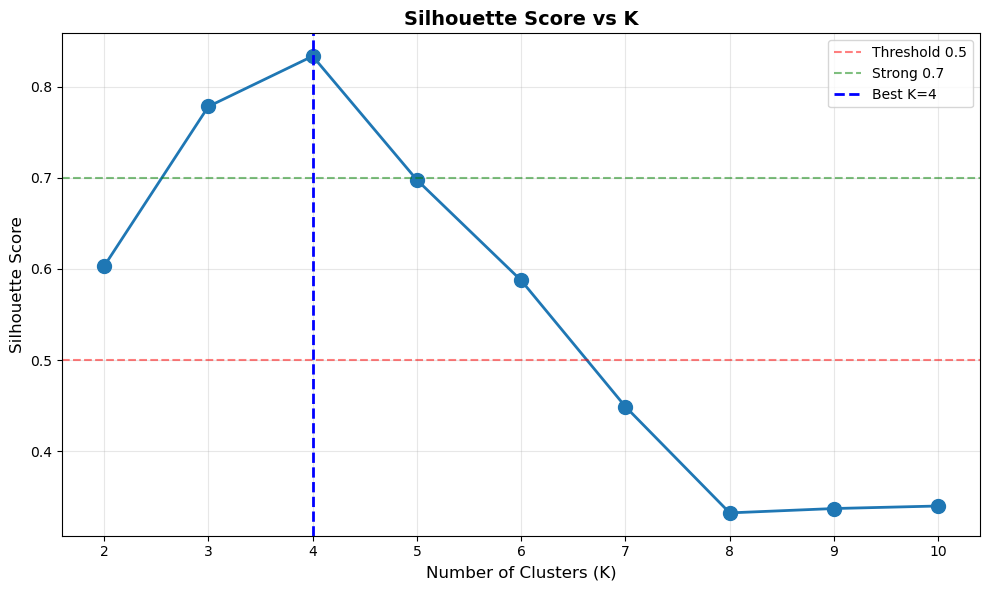


✅ Best K by Silhouette Score: 4
   Score: 0.834


In [17]:
# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold 0.5')
plt.axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Strong 0.7')

best_k = list(K_range)[np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='blue', linestyle='--', linewidth=2, 
           label=f'Best K={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f'\n✅ Best K by Silhouette Score: {best_k}')
print(f'   Score: {max(silhouette_scores):.3f}')

---
## Part 8: Complete Project - Customer Segmentation

**Real-world clustering application**

In [18]:
# Generate synthetic customer data
np.random.seed(42)
n_customers = 200

# Features: Annual Income (k$), Spending Score (1-100)
customers = pd.DataFrame({
    'Annual_Income': np.random.randint(15, 140, n_customers),
    'Spending_Score': np.random.randint(1, 100, n_customers)
})

print('✅ Customer data generated!')
print(f'\nNumber of customers: {len(customers)}')
print('\nFirst few customers:')
print(customers.head())
print('\n💡 Goal: Segment customers for targeted marketing')

✅ Customer data generated!

Number of customers: 200

First few customers:
   Annual_Income  Spending_Score
0            117              52
1             66              96
2            107               4
3             29              94
4            121              23

💡 Goal: Segment customers for targeted marketing


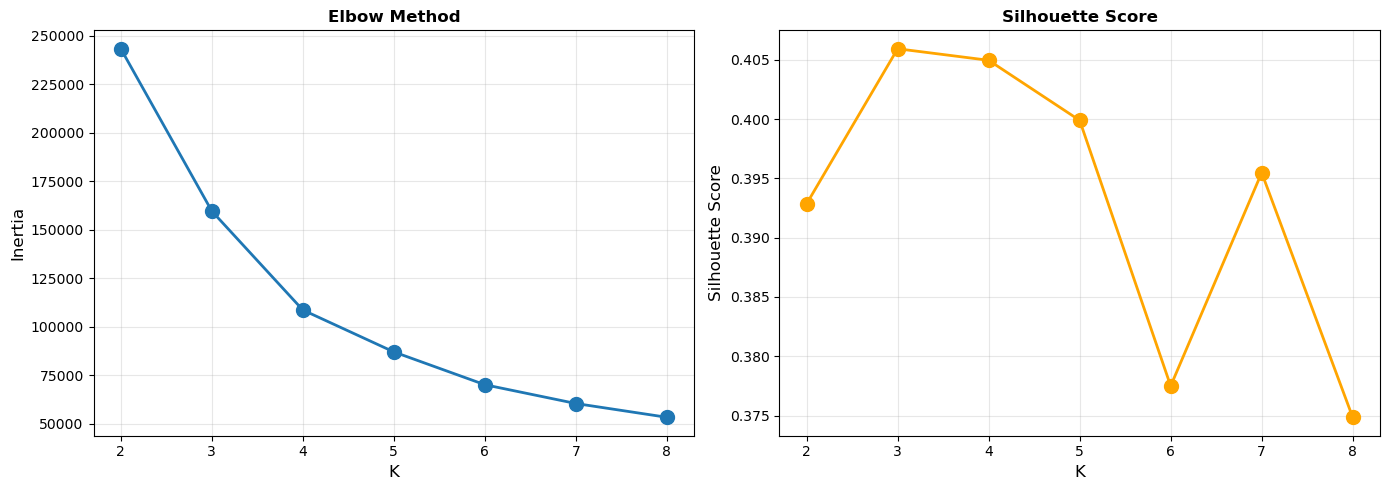


✅ Optimal K: 3


In [19]:
# Find optimal K using both methods
X_cust = customers.values

# Elbow method
inertias = []
silhouettes = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_cust)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cust, clusters))

# Plot both
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=10)
axes[0].set_xlabel('K', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette
axes[1].plot(K_range, silhouettes, marker='o', linewidth=2, markersize=10, color='orange')
axes[1].set_xlabel('K', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_k = list(K_range)[np.argmax(silhouettes)]
print(f'\n✅ Optimal K: {best_k}')

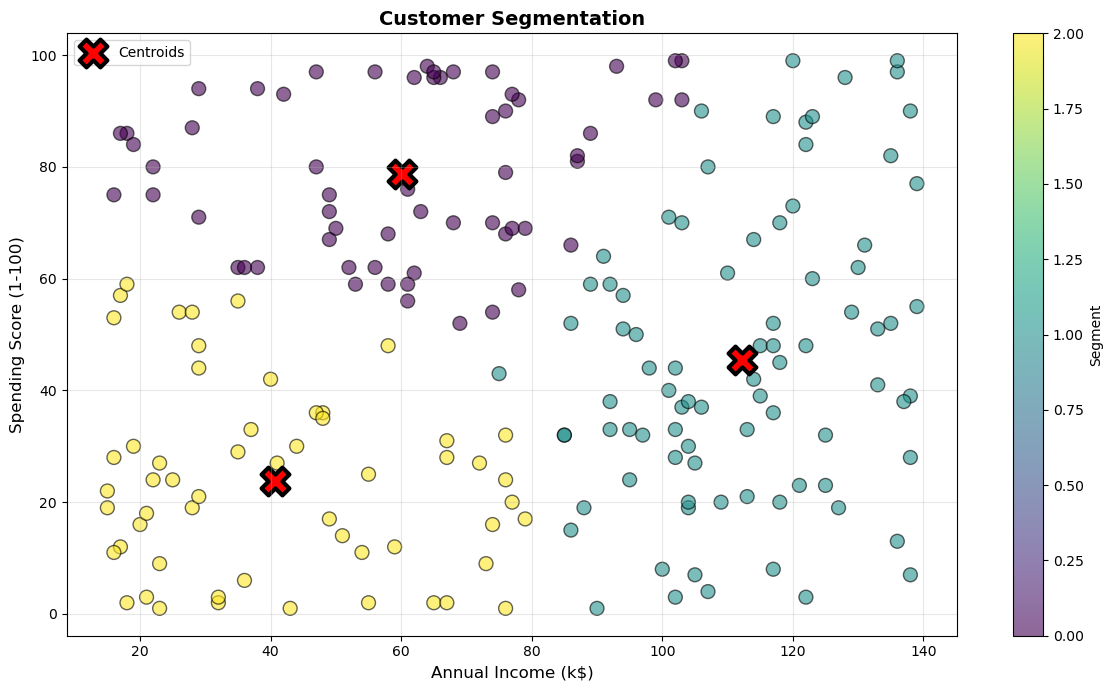


✅ Customer segmentation complete!


In [20]:
# Apply K-Means with optimal K
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
customers['Segment'] = kmeans_final.fit_predict(X_cust)

# Visualize segments
plt.figure(figsize=(12, 7))
scatter = plt.scatter(customers['Annual_Income'], 
                     customers['Spending_Score'],
                     c=customers['Segment'], 
                     cmap='viridis', s=100, alpha=0.6, edgecolors='k')
plt.scatter(kmeans_final.cluster_centers_[:, 0],
           kmeans_final.cluster_centers_[:, 1],
           c='red', marker='X', s=400, edgecolors='black',
           linewidths=3, label='Centroids')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Segment')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('\n✅ Customer segmentation complete!')

In [21]:
# Analyze segments
print('📊 Segment Analysis:\n')
for seg in range(best_k):
    seg_data = customers[customers['Segment'] == seg]
    print(f'Segment {seg}:')
    print(f'  Size: {len(seg_data)} customers')
    print(f'  Avg Income: ${seg_data["Annual_Income"].mean():.0f}k')
    print(f'  Avg Spending: {seg_data["Spending_Score"].mean():.0f}')
    print()

print('🎯 Business Insights:')
print('• Target high-income, high-spending customers')
print('• Create promotions for low-spending groups')
print('• Personalize marketing by segment')

📊 Segment Analysis:

Segment 0:
  Size: 60 customers
  Avg Income: $60k
  Avg Spending: 79

Segment 1:
  Size: 84 customers
  Avg Income: $112k
  Avg Spending: 45

Segment 2:
  Size: 56 customers
  Avg Income: $41k
  Avg Spending: 24

🎯 Business Insights:
• Target high-income, high-spending customers
• Create promotions for low-spending groups
• Personalize marketing by segment


---
## 🎯 Beginner Challenge

**Your Task:** Build a complete clustering pipeline for the Iris dataset!

**Requirements:**
1. Load the full Iris dataset (all 4 features)
2. Scale the features using StandardScaler
3. Use the Elbow Method to find optimal K (test K from 2 to 8)
4. Calculate Silhouette Scores for each K
5. Choose the best K and apply K-Means
6. Visualize the first 2 features with cluster colors
7. Compare your clusters with true species labels
8. Print cluster sizes and centers

**Hints:**
- Use `iris.data` for features (all 4)
- Scale before clustering!
- Plot both Elbow and Silhouette curves
- True labels are in `iris.target` (for comparison only)

**Expected Output:**
- Elbow and Silhouette plots
- Optimal K identified
- Cluster visualization
- Cluster analysis

**Bonus (Optional):**
- Try different numbers of features (2, 3, or all 4)
- Compare K-Means with KNN classification
- Use PCA to reduce to 2D for better visualization

---

In [22]:
# Your code here - Good luck! 🚀

# Step 1: Load data
# iris = load_iris()
# X = iris.data

# Step 2: Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 3-4: Elbow & Silhouette
# for k in range(2, 9):
#     ...

# Step 5: Apply K-Means
# kmeans = KMeans(n_clusters=best_k)

# Step 6-8: Visualize and analyze
# ...

---
## 📚 Summary

### What We Learned:

**1. K-Nearest Neighbors (KNN):**
- Supervised algorithm
- "You are your K neighbors"
- Works for classification & regression
- No training phase (lazy learning)
- Always scale features!

**2. Distance Metrics:**
- Euclidean: Straight line distance (most common)
- Manhattan: City block distance
- Choice affects which points are "closest"

**3. Clustering:**
- Unsupervised learning (no labels!)
- Finds natural groups in data
- Many real-world applications

**4. K-Means:**
- Most popular clustering algorithm
- Iterative: assign → update → repeat
- Fast and scalable

**5. Elbow Method:**
- Finds optimal K
- Look for the "elbow" in inertia plot
- Where adding clusters doesn't help much

**6. Silhouette Score:**
- Measures cluster quality
- Range: -1 (bad) to +1 (good)
- Higher is better!

### 🎯 Key Takeaways:
- KNN is simple but powerful
- Scale features before using KNN
- Use odd K for binary classification (avoids ties)
- Clustering finds hidden patterns
- Use both Elbow + Silhouette to choose K
- Visualize your clusters!

### 💡 Pro Tips:
- Start with K=3, 5, 7 for KNN
- K-Means works best on spherical clusters
- Try multiple random initializations
- Domain knowledge helps interpret clusters
- Always validate clustering makes business sense

### When to Use What:
- **KNN:** When you have labels and want to classify new points
- **K-Means:** When you want to find groups in unlabeled data

---

**Great job! You've mastered KNN and Clustering! 🎉**